In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

# We're setting an option in pandas to display a maximum of 50 columns when showing DataFrames
pd.set_option('display.max_columns', 50)

# We're setting the plotting style to 'bmh' (Bayesian Methods for Hackers) using matplotlib
plt.style.use('bmh')

# We're accessing the color palette used by default in matplotlib and assigning it to 'color_pal'
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# We're creating a cycle object from the color palette to iterate through colors
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
# Read in the data
cal = pd.read_csv('calendar.csv')
stv = pd.read_csv('sales_train_validation.csv')
ss = pd.read_csv('sample_submission.csv')
sellp = pd.read_csv('sell_prices.csv')

In [4]:
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [29]:
# Summary Statistics
print("\nSummary Statistics:")
stv.describe()


Summary Statistics:


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,...,1.137455,1.493473,1.727517,1.850607,1.325615,1.301509,1.283503,1.250115,1.417514,1.847819,1.766350,1.391505,1.281371,1.154247,1.230863,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,...,2.982687,3.696225,4.371541,4.549733,3.353388,3.375255,3.429146,3.292236,3.730618,4.619235,4.290072,3.620804,3.329683,2.933918,3.303282,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,279.000000,258.000000,163.000000,107.000000,133.000000,149.000000,122.000000,111.000000,83.000000,95.000000,100.000000,132.000000,120.000000,113.000000,158.000000,...,130.000000,156

In [22]:
# Group the dataset by the category column
grouped_by_category = stv.groupby('cat_id')

# Create an empty dictionary to store the top 10 most sold product IDs and their total units sold for each category
top_products_dict = {}

# Iterate over each category group
for category, group in grouped_by_category:
    # Filter columns starting with 'd_' to get sales data
    sales_cols = [col for col in group.columns if col.startswith('d_')]

    # Calculate total sales for each product in the category group
    total_sales = group[sales_cols].sum(axis=1)

    # Sort products based on total sales
    sorted_products = total_sales.sort_values(ascending=False)

    # Select the top 10 most sold products
    top_10_products = sorted_products.head(10)

    # Get the product IDs and total units sold for the top 10 products
    top_10_product_data = []
    for product_id in top_10_products.index:
        product_data = {
            'product_id': group.loc[product_id, 'id'],
            'total_units_sold': top_10_products[product_id]
        }
        top_10_product_data.append(product_data)

    # Store the product data in the dictionary
    top_products_dict[category] = top_10_product_data

# Display the list of product IDs and total units sold for the top 10 most sold products from each category
print("Top 10 Most Sold Products from Each Category:")
for category, top_products in top_products_dict.items():
    print(f"Category: {category}")
    print("Product ID | Total Units Sold")
    for product_data in top_products:
        print(f"{product_data['product_id']} | {product_data['total_units_sold']}")
    print()


Top 10 Most Sold Products from Each Category:
Category: FOODS
Product ID | Total Units Sold
FOODS_3_090_CA_3_validation | 250502
FOODS_3_586_TX_2_validation | 192835
FOODS_3_586_TX_3_validation | 150122
FOODS_3_586_CA_3_validation | 134386
FOODS_3_090_CA_1_validation | 127203
FOODS_3_090_WI_3_validation | 121434
FOODS_3_090_TX_2_validation | 119496
FOODS_3_090_TX_3_validation | 114854
FOODS_3_252_TX_2_validation | 114153
FOODS_3_586_TX_1_validation | 112454

Category: HOBBIES
Product ID | Total Units Sold
HOBBIES_1_234_CA_3_validation | 29742
HOBBIES_1_348_CA_1_validation | 22744
HOBBIES_1_371_CA_1_validation | 22595
HOBBIES_1_254_CA_3_validation | 20996
HOBBIES_1_371_CA_3_validation | 19812
HOBBIES_1_348_CA_3_validation | 19407
HOBBIES_1_268_CA_1_validation | 18904
HOBBIES_1_341_CA_3_validation | 17844
HOBBIES_1_015_CA_3_validation | 17630
HOBBIES_1_268_CA_3_validation | 16973

Category: HOUSEHOLD
Product ID | Total Units Sold
HOUSEHOLD_1_118_CA_3_validation | 43351
HOUSEHOLD_1_459_CA

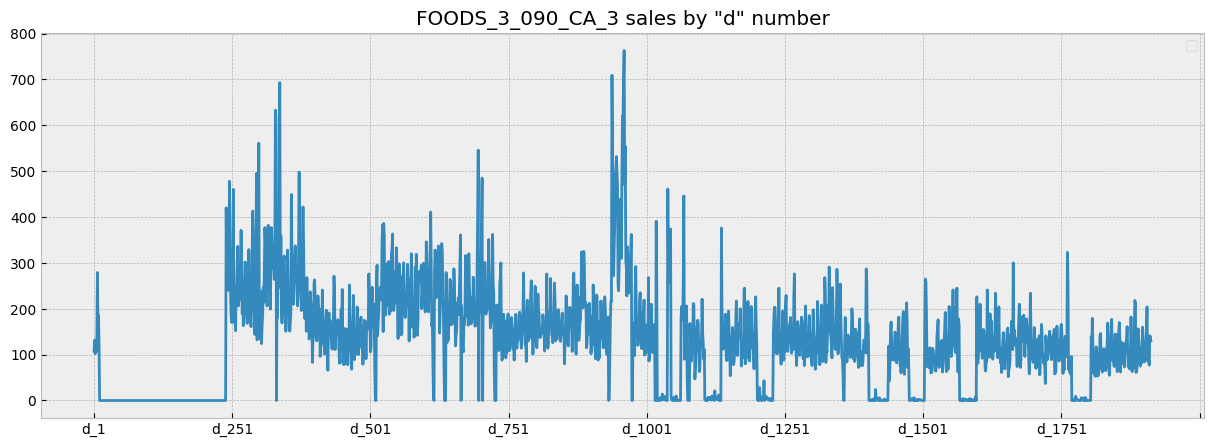

In [24]:
# We're creating a list of column names in the DataFrame 'stv' that contain the substring 'd_'
d_cols = [c for c in stv.columns if 'd_' in c]  # sales data columns

# Selecting rows where the 'id' column is equal to 'FOODS_3_090_CA_3_validation'
selected_data = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation']

# Setting the 'id' column as the index
selected_data_indexed = selected_data.set_index('id')

# Keeping only the columns specified in 'd_cols'
selected_data_cols = selected_data_indexed[d_cols]

# Transposing the DataFrame so that columns become rows and vice versa
transposed_data = selected_data_cols.T

# Plotting the transposed data with a specified figure size and title, using the next color from the color cycle
transposed_data.plot(figsize=(15, 5),
                     title='FOODS_3_090_CA_3 sales by "d" number',
                     color=next(color_cycle))

# Removing the legend from the plot
plt.legend('')

# Displaying the plot
plt.show()


In [7]:
# Calendar data looks like this
cal[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,2011-01-29,NaN,NaN,NaN,NaN,0
1,d_2,2011-01-30,NaN,NaN,NaN,NaN,0
2,d_3,2011-01-31,NaN,NaN,NaN,NaN,0
3,d_4,2011-02-01,NaN,NaN,NaN,NaN,1
4,d_5,2011-02-02,NaN,NaN,NaN,NaN,1


In [35]:
# Search for rows where a specific column meets a condition
stv[stv['id'] == 'FOODS_3_090_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,cluster
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,...,156,133,114,80,75,113,81,107,160,124,107,84,88,90,129,160,204,86,100,88,77,141,139,130,2


In [33]:
stv[stv['id'] == 'HOBBIES_1_234_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,cluster
6324,HOBBIES_1_234_CA_3_validation,HOBBIES_1_234,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,24,20,29,51,6,28,4,78,0,8,20,68,0,24,12,70,0,38,0,54,30,4,32,1


In [34]:
stv[stv['id'] == 'HOUSEHOLD_1_351_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,cluster
7007,HOUSEHOLD_1_351_CA_3_validation,HOUSEHOLD_1_351,HOUSEHOLD_1,HOUSEHOLD,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,7,18,0,13,11,10,13,8,31,21,6,1,9,23,13,15,7,16,11,4,15,9,6,1


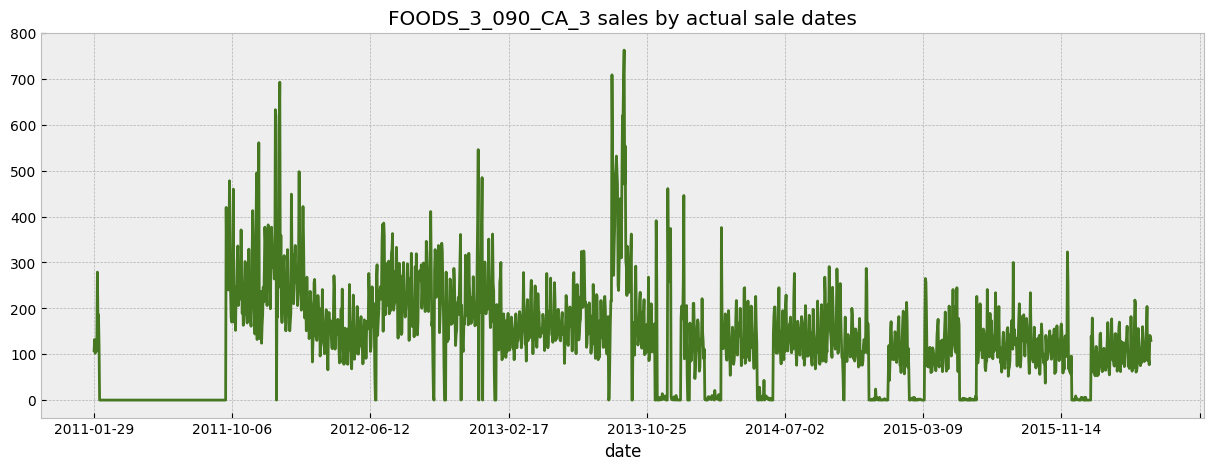

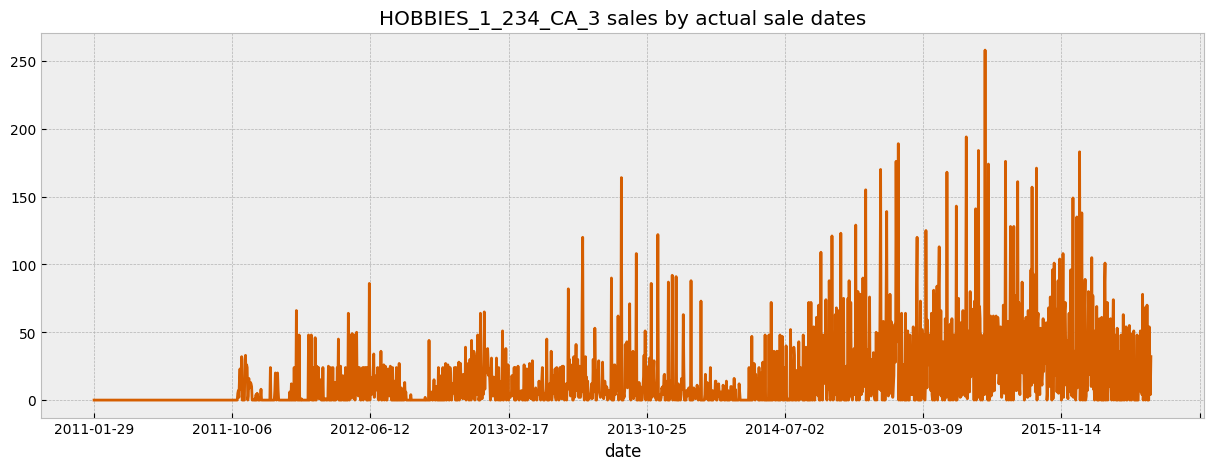

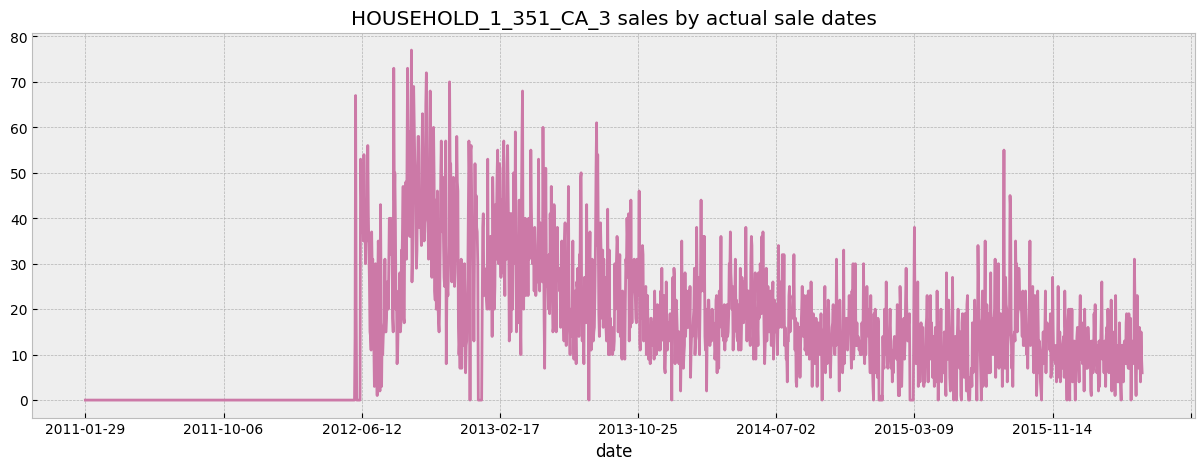

In [29]:
# Selecting and transposing sales data for a specific item ('FOODS_3_090_CA_3_validation')
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T

# Renaming the column to 'FOODS_3_090_CA_3'
example = example.rename(columns={8412:'FOODS_3_090_CA_3'})

# Resetting the index and renaming the index column to 'd'
example = example.reset_index().rename(columns={'index': 'd'})

# Merging with the calendar data based on 'd' column, ensuring one-to-one relationship
example = example.merge(cal, how='left', validate='1:1')

# Setting the index of the DataFrame 'example' to 'date', then plotting the sales data for 'FOODS_3_090_CA_3'
example.set_index('date')['FOODS_3_090_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('FOODS_3_090_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()


# Selecting and processing sales data for another item ('HOBBIES_1_234_CA_3_validation')
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'})
example2 = example2.merge(cal, how='left', validate='1:1')

# Plotting sales data for 'HOBBIES_1_234_CA_3_validation'
example2.set_index('date')['HOBBIES_1_234_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('HOBBIES_1_234_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()


# Selecting and processing sales data for yet another item ('HOUSEHOLD_1_118_CA_3_validation')
example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_351_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={7007:'HOUSEHOLD_1_351_CA_3'})
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

# Plotting sales data for 'HOUSEHOLD_1_118_CA_3_validation'
example3.set_index('date')['HOUSEHOLD_1_351_CA_3'].plot(figsize=(15, 5), color=next(color_cycle))
# Adding a title to the plot
plt.title('HOUSEHOLD_1_351_CA_3 sales by actual sale dates')
# Displaying the plot
plt.show()

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

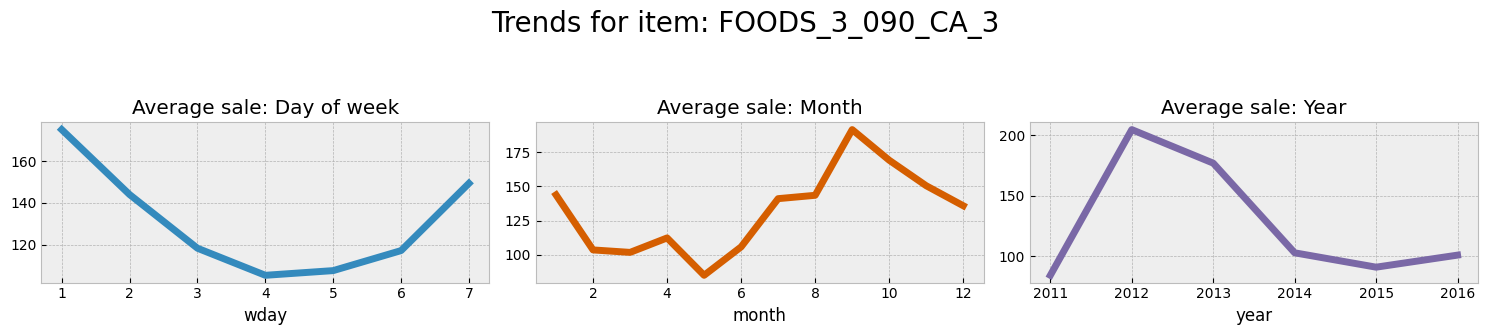

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

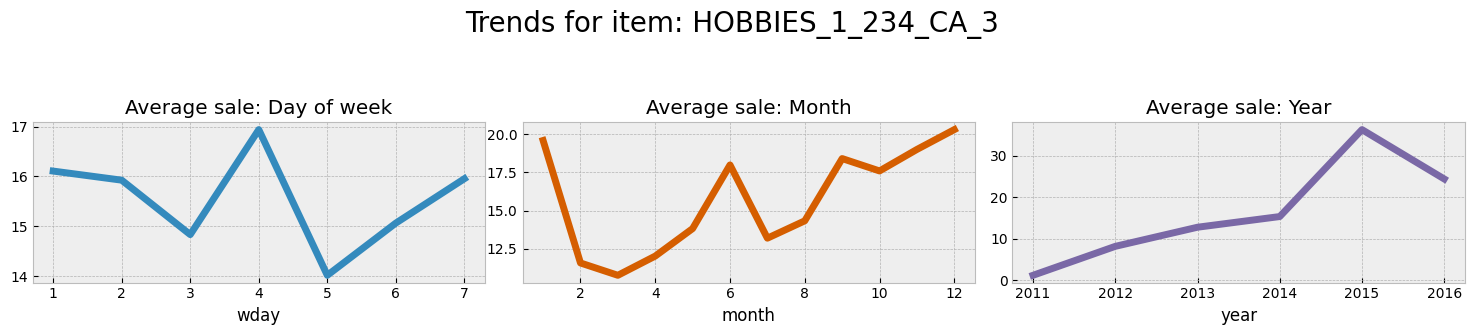

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_1608\3180833385.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

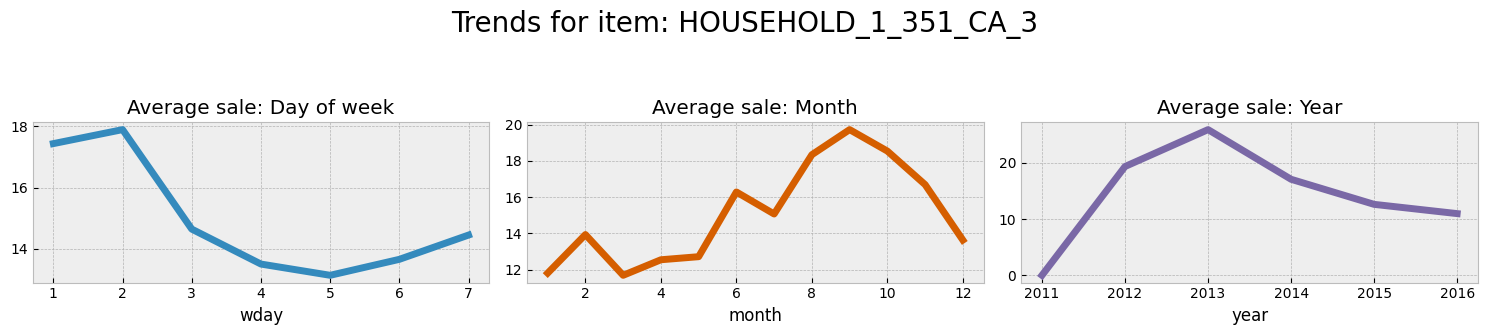

In [36]:
# Define the list of examples
examples = ['FOODS_3_090_CA_3', 'HOBBIES_1_234_CA_3', 'HOUSEHOLD_1_351_CA_3']

# Combine the dataframes into a list
example_df = [example, example2, example3]

# Iterate over each example
for i in range(len(examples)):
    # Create subplots with 1 row and 3 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

    # Plot average sales by day of the week
    example_df[i].groupby('wday').mean()[examples[i]].plot(kind='line',
                                                          title='Average sale: Day of week',
                                                          lw=5,
                                                          color=color_pal[0],
                                                          ax=ax1)

    # Plot average sales by month
    example_df[i].groupby('month').mean()[examples[i]].plot(kind='line',
                                                           title='Average sale: Month',
                                                           lw=5,
                                                           color=color_pal[4],
                                                           ax=ax2)

    # Plot average sales by year
    example_df[i].groupby('year').mean()[examples[i]].plot(kind='line',
                                                          title='Average sale: Year',
                                                          lw=5,
                                                          color=color_pal[2],
                                                          ax=ax3)

    # Add a title to the overall figure
    fig.suptitle(f'Trends for item: {examples[i]}', size=20, y=1.1)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [13]:
# Randomly select 20 examples from the sales data
twenty_examples = stv.sample(20, random_state=529)

# Set the 'id' column as index and select only the sales data columns
twenty_examples = twenty_examples.set_index('id')[d_cols].T

# Merge with the calendar data on the 'd' column, ensuring one-to-one relationship
twenty_examples = twenty_examples.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1')

# Set the 'date' column as index
twenty_examples = twenty_examples.set_index('date')

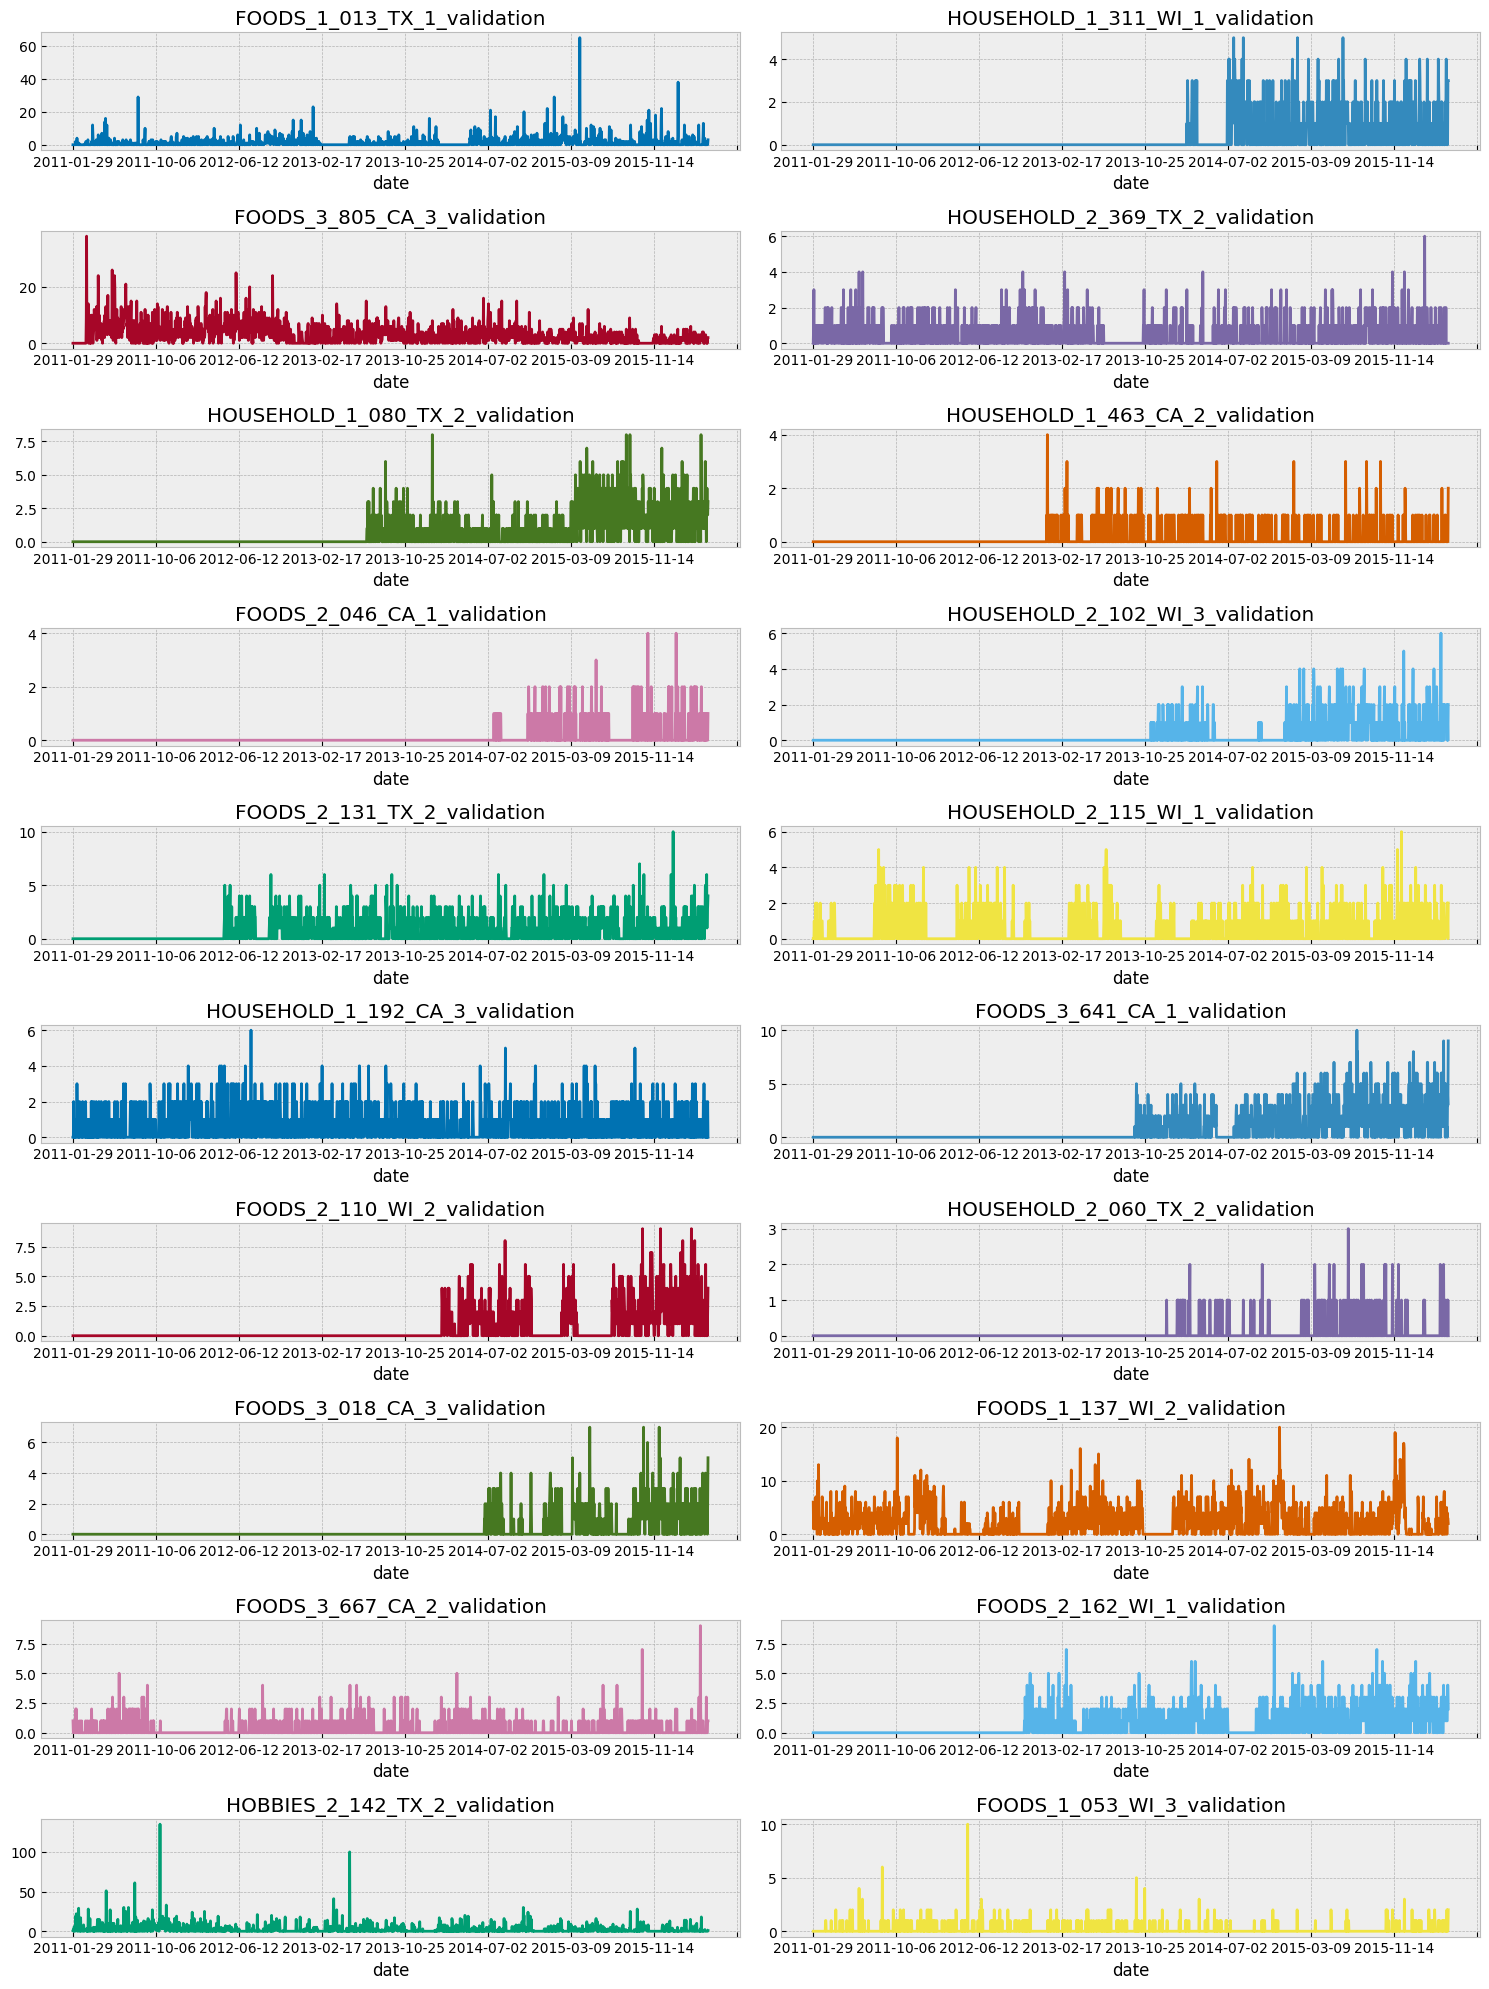

In [14]:
# Create a figure with 10 rows and 2 columns of subplots
fig, axs = plt.subplots(10, 2, figsize=(15, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

# Initialize index for accessing subplots
ax_idx = 0

# Iterate over each item in the twenty_examples DataFrame
for item in twenty_examples.columns:
    # Plot the sales data for the current item on a subplot
    twenty_examples[item].plot(title=item,
                               color=next(color_cycle),
                               ax=axs[ax_idx])

    # Move to the next subplot index
    ax_idx += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

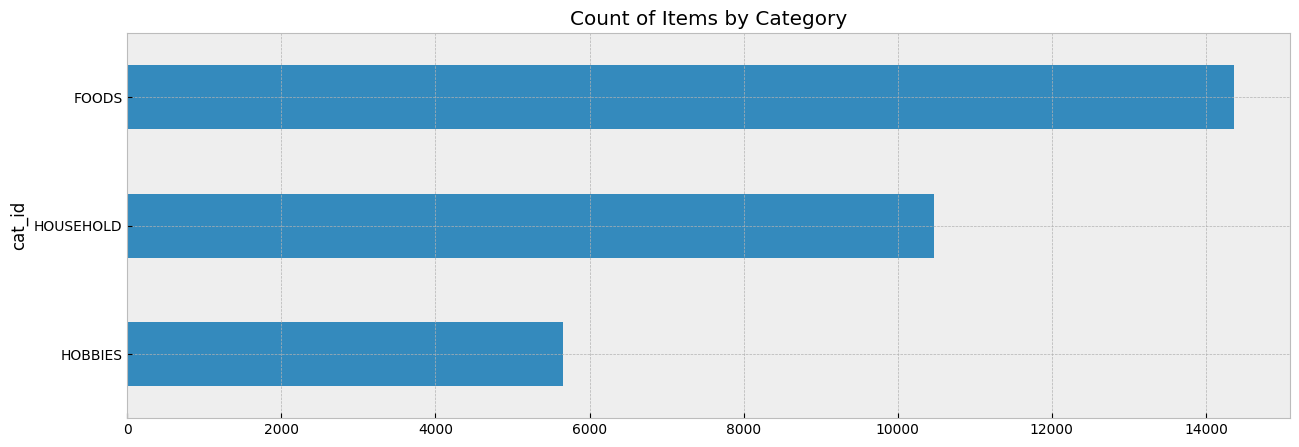

In [15]:
# Group the sales data by 'cat_id' and count the number of unique 'id's in each category
category_counts = stv.groupby('cat_id').count()['id']

# Sort the category counts in ascending order and plot them as a horizontal bar chart
category_counts.sort_values().plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')

# Display the plot
plt.show()

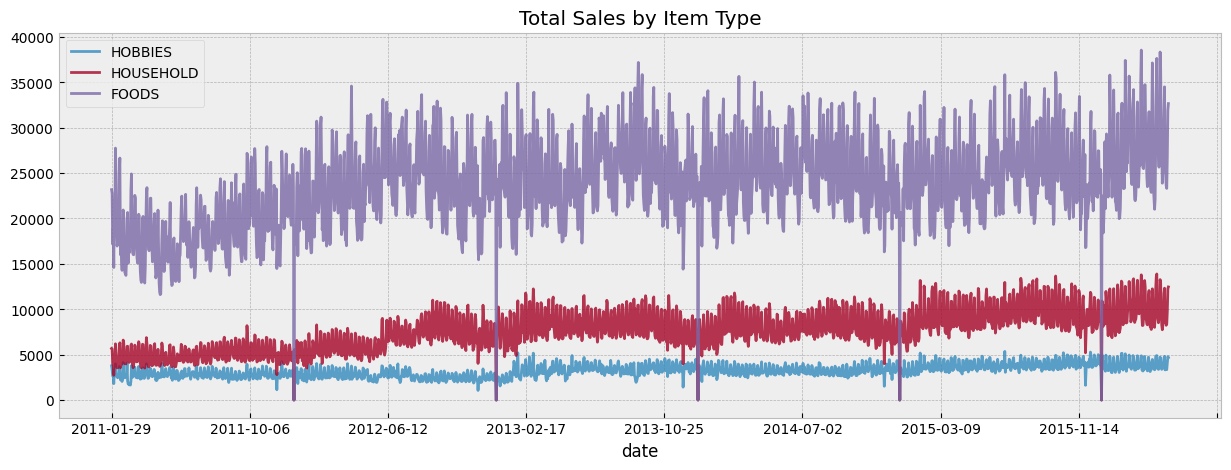

In [16]:
# Create a DataFrame of past sales by setting the index to 'id', transposing it, merging with the calendar data on the date, and setting the index to 'date'
past_sales = stv.set_index('id')[d_cols].T.merge(cal.set_index('d')['date'], left_index=True, right_index=True, validate='1:1').set_index('date')

# Loop over unique values of 'cat_id'
for category in stv['cat_id'].unique():
    # Select columns corresponding to the current category
    category_columns = [column for column in past_sales.columns if category in column]

    # Sum the sales for items in the current category across all dates
    category_sales = past_sales[category_columns].sum(axis=1)

    # Plot the total sales for the current category
    category_sales.plot(figsize=(15, 5), alpha=0.8, title='Total Sales by Item Type')

# Add legend showing each category
plt.legend(stv['cat_id'].unique())

# Display the plot
plt.show()

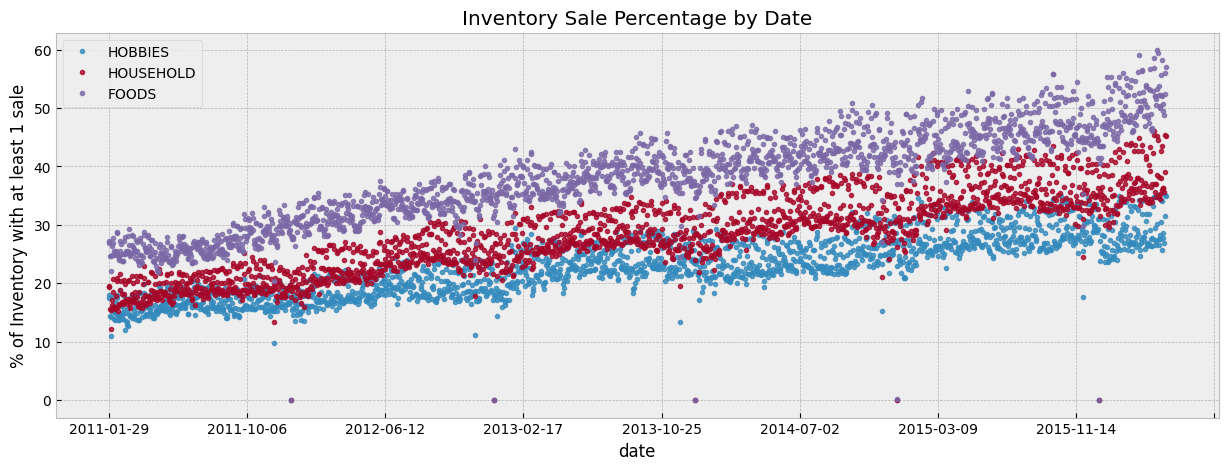

In [17]:
# Clip the past sales data to ensure values are between 0 and 1
past_sales_clipped = past_sales.clip(0, 1)

# Loop over unique values of 'cat_id'
for category in stv['cat_id'].unique():
    # Select columns corresponding to the current category
    category_columns = [column for column in past_sales.columns if category in column]

    # Calculate the mean sale percentage for items in the current category across all dates
    category_mean_sale_percentage = (past_sales_clipped[category_columns].mean(axis=1) * 100)

    # Plot the mean sale percentage for the current category
    category_mean_sale_percentage.plot(figsize=(15, 5), alpha=0.8, title='Inventory Sale Percentage by Date', style='.')

# Add ylabel to the plot
plt.ylabel('% of Inventory with at least 1 sale')

# Add legend showing each category
plt.legend(stv['cat_id'].unique())

# Display the plot
plt.show()


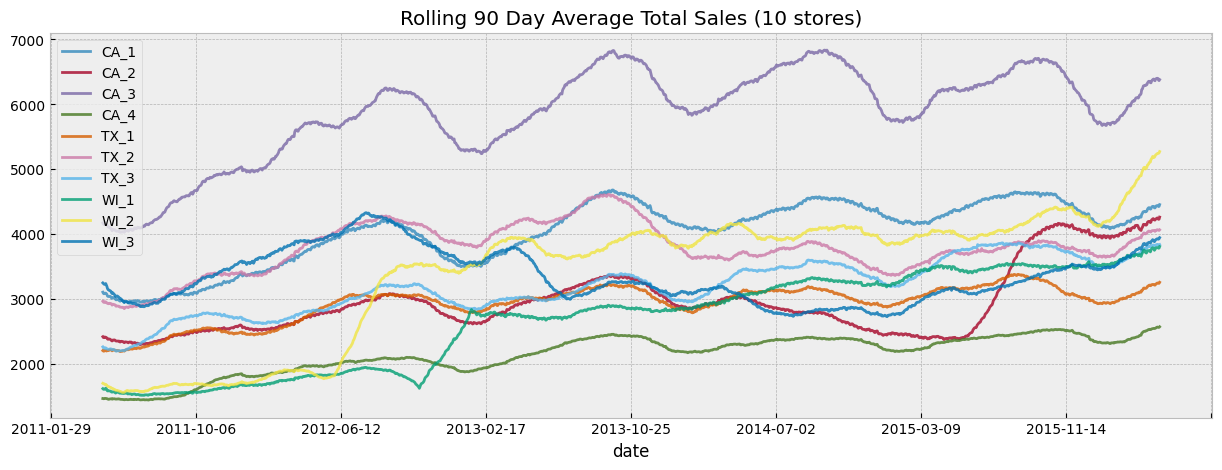

In [18]:
# Get unique store IDs from the sales prices DataFrame
store_list = sellp['store_id'].unique()

# Loop over each store ID
for store_id in store_list:
    # Select columns corresponding to the current store
    store_columns = [column for column in past_sales.columns if store_id in column]

    # Calculate the rolling 90-day average total sales for items in the current store
    store_total_sales_rolling_mean = past_sales[store_columns].sum(axis=1).rolling(90).mean()

    # Plot the rolling 90-day average total sales for the current store
    store_total_sales_rolling_mean.plot(figsize=(15, 5), alpha=0.8, title='Rolling 90 Day Average Total Sales (10 stores)')

# Add legend showing each store ID
plt.legend(store_list)

# Display the plot
plt.show()

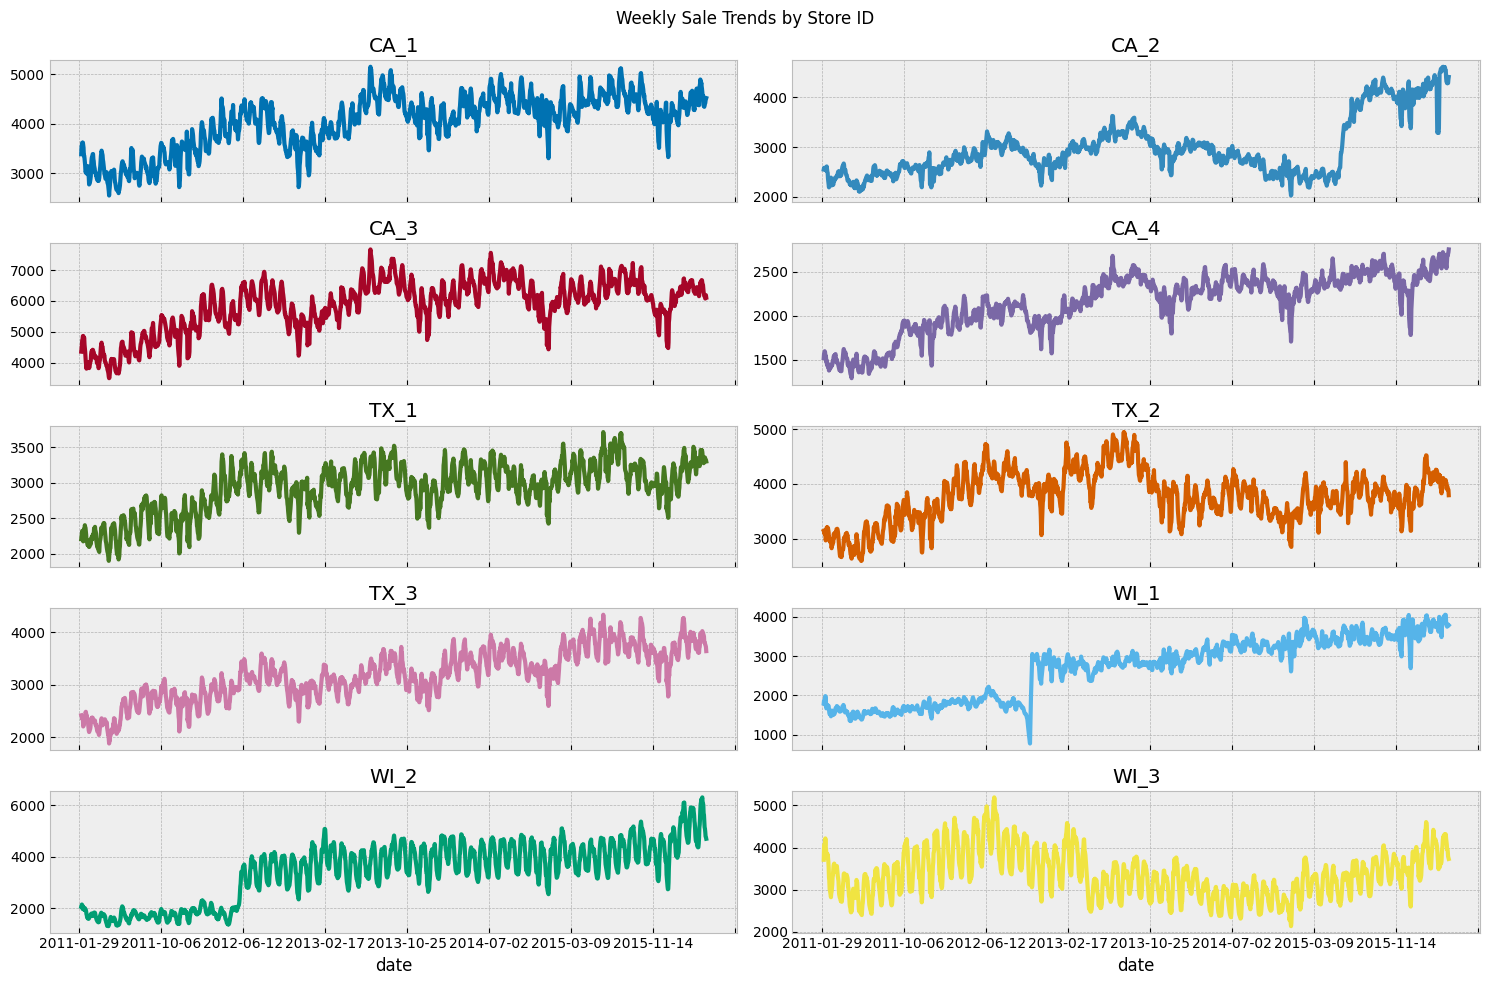

In [19]:
# Create subplots with 5 rows and 2 columns, sharing the x-axis
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots to a 1D array
axes = axes.flatten()

# Initialize index for accessing subplots
ax_idx = 0

# Loop over each store ID
for store_id in store_list:
    # Select columns corresponding to the current store
    store_columns = [column for column in past_sales.columns if store_id in column]

    # Calculate the rolling 7-day average total sales for items in the current store
    store_total_sales_rolling_mean = past_sales[store_columns].sum(axis=1).rolling(7).mean()

    # Plot the rolling 7-day average total sales for the current store on a subplot
    store_total_sales_rolling_mean.plot(alpha=1, ax=axes[ax_idx], title=store_id, lw=3, color=next(color_cycle))

    # Move to the next subplot index
    ax_idx += 1

# Add overall title to the figure
plt.suptitle('Weekly Sale Trends by Store ID')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta

def calmap(ax, year, data):
    # Set tick parameters for the x-axis
    ax.tick_params('x', length=0, labelsize="medium", which='major')

    # Set tick parameters for the y-axis
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Draw month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        # Determine coordinates for the month polygon
        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j")) + start - 1) // 7
        x1 = (int(last.strftime("%j")) + start - 1) // 7

        # Define polygon points
        P = [(x0, y0), (x0, 7), (x1, 7),
             (x1, y1 + 1), (x1 + 1, y1 + 1), (x1 + 1, 0),
             (x0 + 1, 0), (x0 + 1, y0)]

        # Calculate position for month label
        xticks.append(x0 + (x1 - x0 + 1) / 2)
        labels.append(first.strftime("%b"))

        # Create and add polygon to the plot
        poly = Polygon(P, edgecolor="black", facecolor="None", linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)

    # Set x-axis tick marks and labels
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)

    # Set y-axis tick marks and labels
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

    # Set plot title
    ax.set_title("{}".format(year), weight="semibold")

    # Clear first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid, 0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    data[valid + 1:, x1] = np.nan

    # Show data on the plot
    ax.imshow(data, extent=[0, 53, 0, 7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

In [21]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The highest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2012-12-25 with 11 sales
The highest sale date was: 2016-03-06 with 57218 sales


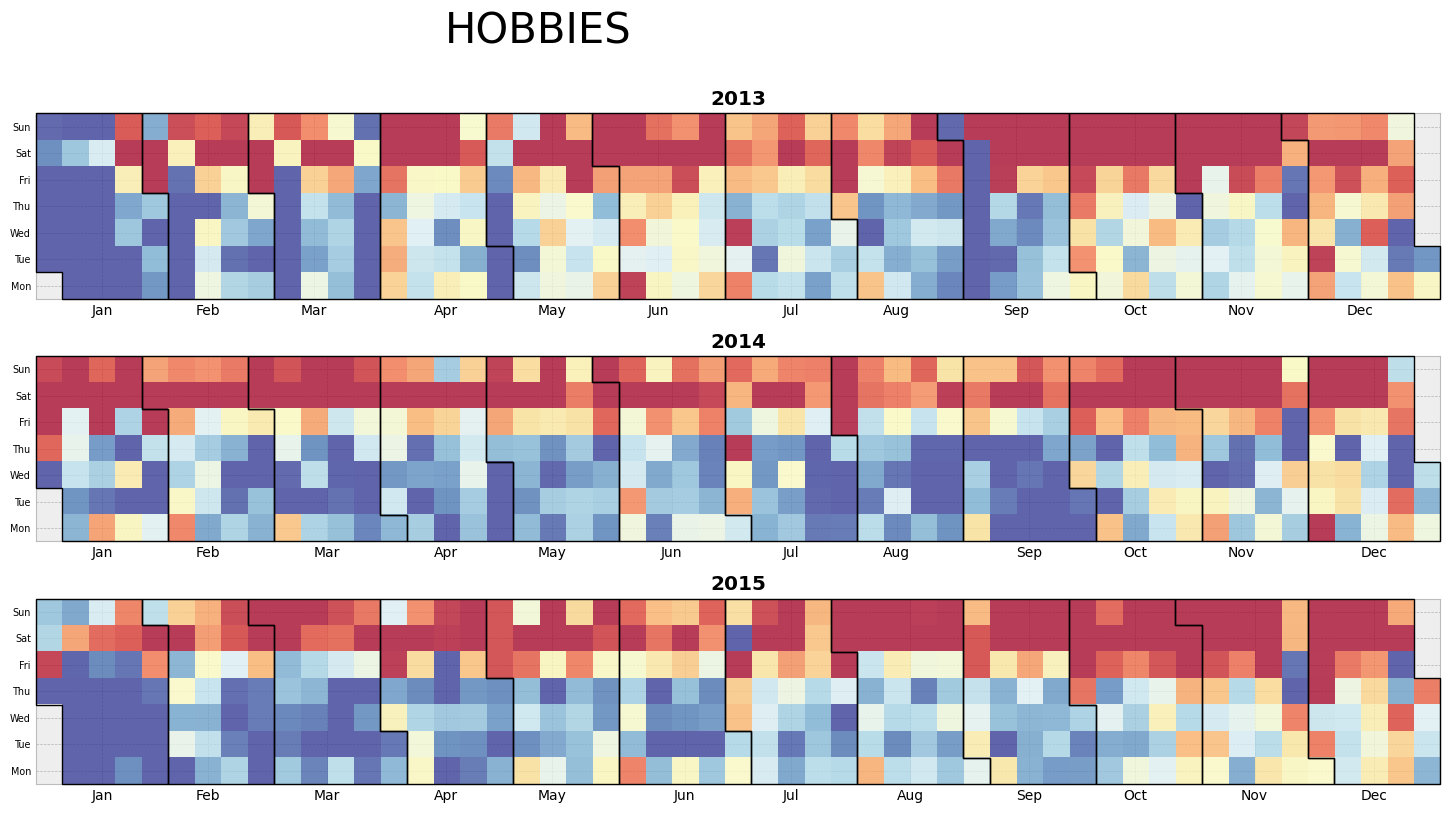

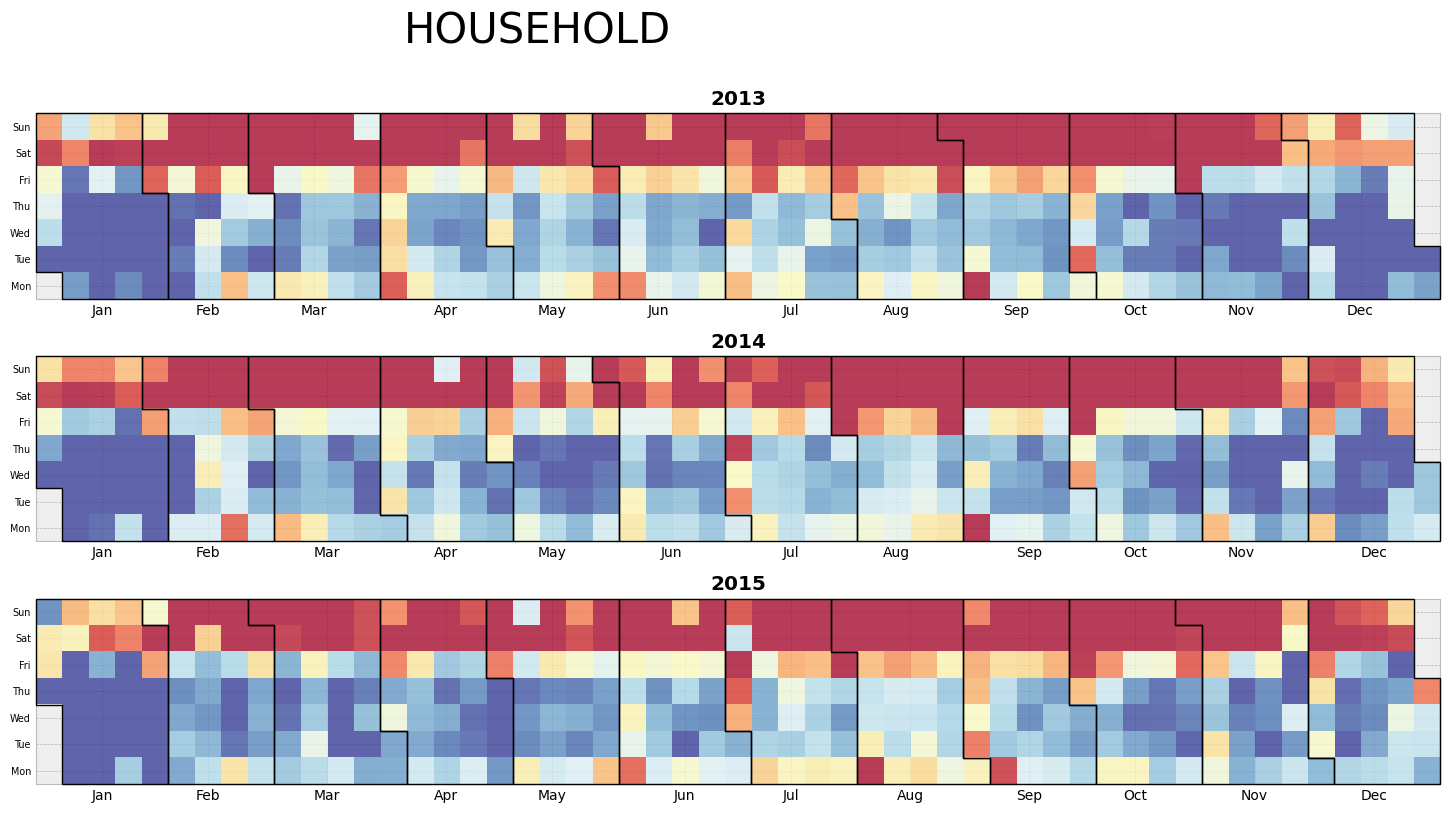

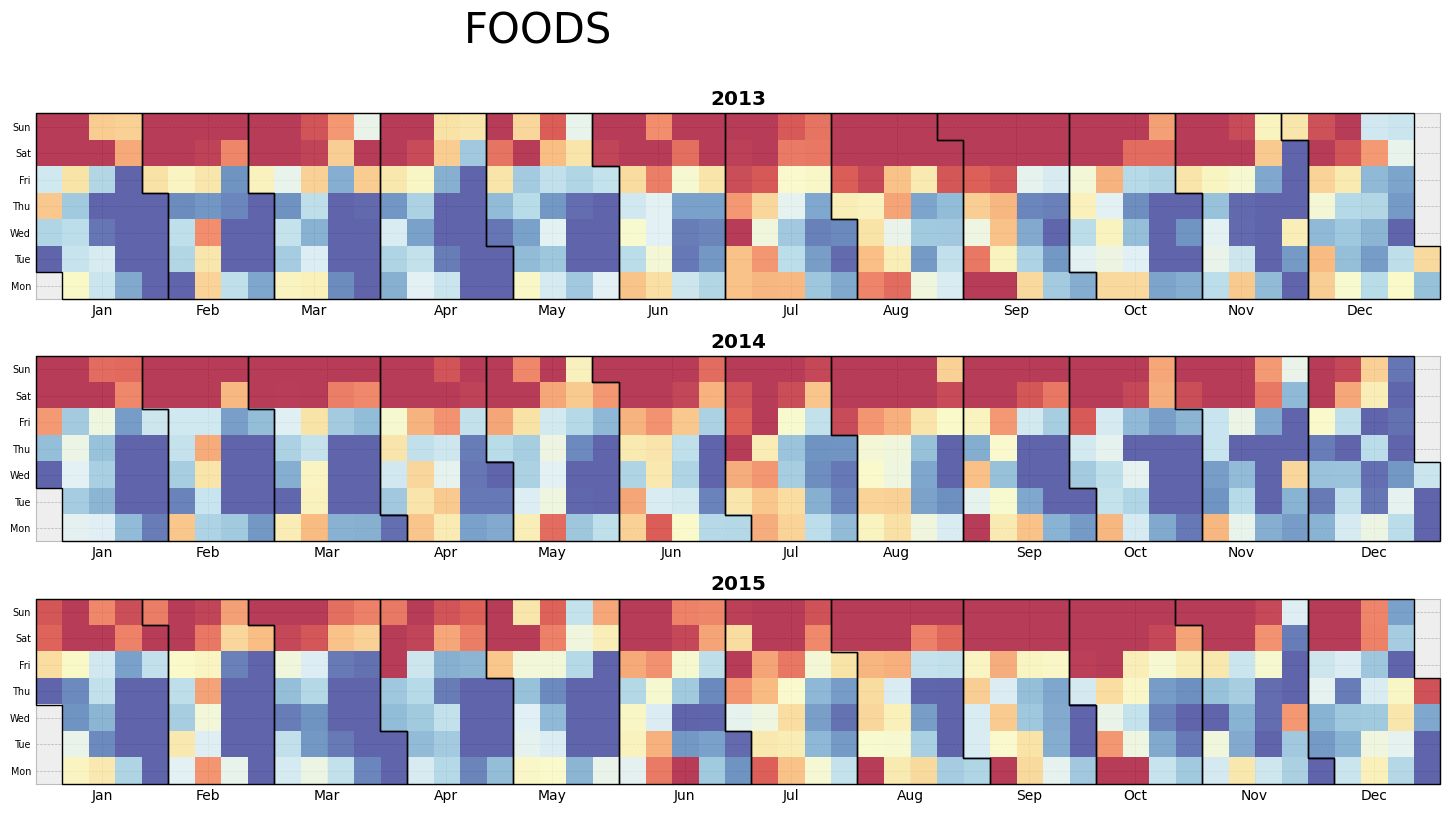

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sscale = StandardScaler()

# Convert the index of past_sales to datetime
past_sales.index = pd.to_datetime(past_sales.index)

# Loop over unique values of 'cat_id'
for category in stv['cat_id'].unique():
    # Create subplots for each year
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))

    # Select columns corresponding to the current category
    items_col = [column for column in past_sales.columns if category in column]

    # Extract mean sales for 2013, scale the data, and plot the calendar heatmap
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012', periods=371))][items_col].mean(axis=1)
    scaled_sales2013 = sscale.fit_transform(sales2013.values.reshape(-1, 1)).reshape(53, 7).T
    calmap(axes[0], 2013, scaled_sales2013)

    # Extract mean sales for 2014, scale the data, and plot the calendar heatmap
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013', periods=371))][items_col].mean(axis=1)
    scaled_sales2014 = sscale.fit_transform(sales2014.values.reshape(-1, 1)).reshape(53, 7).T
    calmap(axes[1], 2014, scaled_sales2014)

    # Extract mean sales for 2015, scale the data, and plot the calendar heatmap
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014', periods=371))][items_col].mean(axis=1)
    scaled_sales2015 = sscale.fit_transform(sales2015.values.reshape(-1, 1)).reshape(53, 7).T
    calmap(axes[2], 2015, scaled_sales2015)

    # Set the title for the subplot group
    plt.suptitle(category, fontsize=30, x=0.4, y=1.01)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

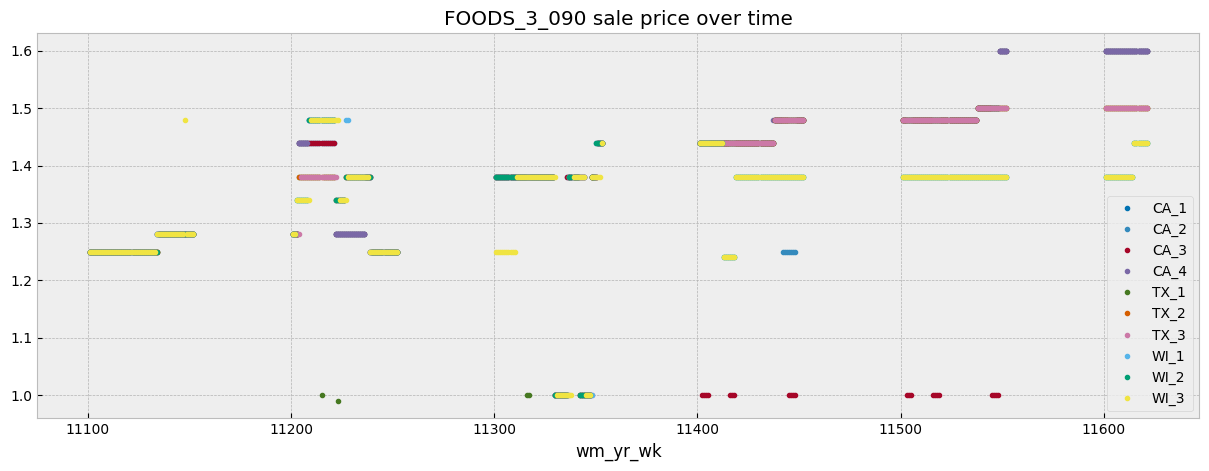

In [23]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Initialize an empty list to store store IDs
stores = []

# Group sell prices by store for the item FOODS_3_090
for store, data in sellp.query('item_id == "FOODS_3_090"').groupby('store_id'):
    # Plot sell prices over time
    data.plot(x='wm_yr_wk',
              y='sell_price',
              style='.',
              color=next(color_cycle),
              figsize=(15, 5),
              title='FOODS_3_090 sale price over time',
              ax=ax,
              legend=store)

    # Add the store ID to the list
    stores.append(store)

# Add legend for each store
plt.legend(stores)

# Show the plot
plt.show()

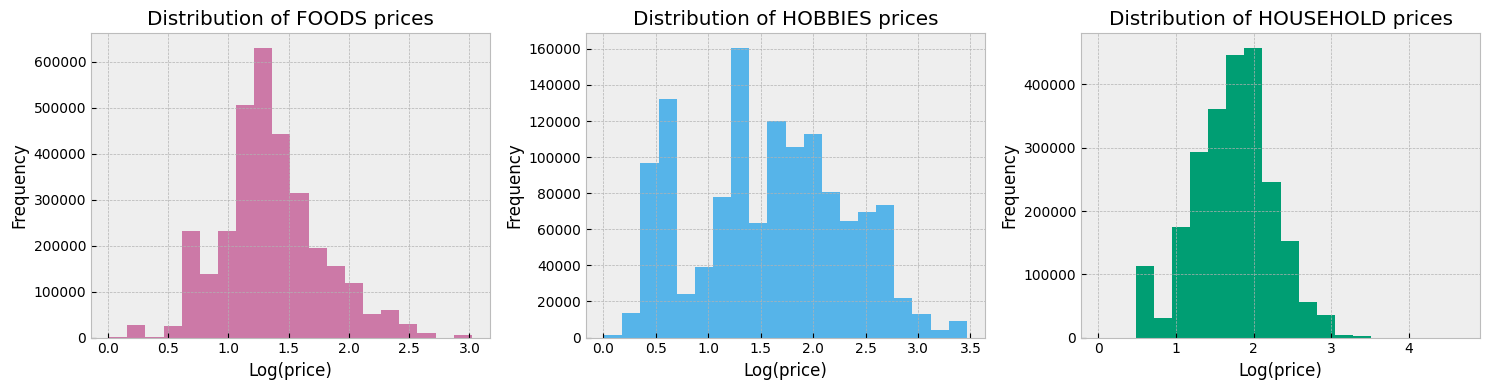

In [26]:
# Extract the category from the item_id and create a new column 'Category'
sellp['Category'] = sellp['item_id'].str.split('_', expand=True)[0]

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Initialize index for accessing subplots
i = 0

# Group sell prices by category and plot histograms of log-transformed prices for each category
for category, data in sellp.groupby('Category'):
    # Plot histogram of log-transformed prices
    ax = data['sell_price'].apply(np.log1p).plot(kind='hist',
                                                 bins=20,
                                                 title=f'Distribution of {category} prices',
                                                 ax=axs[i],
                                                 color=next(color_cycle))
    # Set x-axis label
    ax.set_xlabel('Log(price)')

    # Move to the next subplot index
    i += 1

# Adjust layout and display the plot
plt.tight_layout()

In [23]:
# Calculate the thirty-day average sales for each item
thirty_day_avg_map = stv.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()

# Select columns with 'F' in their names
fcols = [column for column in ss.columns if 'F' in column]

# Map thirty-day average sales to each item in the sales submission dataset and fill missing values with 0
for column in fcols:
    ss[column] = ss['id'].map(thirty_day_avg_map).fillna(0)

# Save the modified sales submission dataset to a CSV file
ss.to_csv('submission.csv', index=False)
